In [170]:
import autograd.numpy as np  
from autograd import grad, elementwise_grad
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [171]:
#Defining some activation functions and their derivative
def ReLU(z):
    return np.where(z > 0, z, 0)

def ReLU_der(z):
    return np.where(z > 0, 1, 0)
"""
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
"""
def sigmoid(z):
    return 1 / (1 + np.power(np.e, -1.0 * z))

def sigmoid_der(z):
    return sigmoid(z) * (1 - sigmoid(z))

def mse(predict, y_train):
    return np.mean((predict - y_train) ** 2)

def mse_der(predict, y_train):
    return 2 * (predict - y_train) / np.prod(predict.shape)



In [172]:

# Better init (He for ReLU)
def create_layers_batch(network_input_size, layer_output_sizes):
    layers = []
    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        std = np.sqrt(2 / i_size)  # He init
        W = np.random.randn(i_size, layer_output_size) * std  # Flipped dims for clarity
        b = np.zeros(layer_output_size)
        layers.append((W, b))
        i_size = layer_output_size
    return layers

# Update forward/backprop for new W shape (x @ W)
def feed_forward_saver_batch(x, layers, activation_funcs):
    layer_inputs = []
    zs = []
    a = x
    for (W, b), activation_func in zip(layers, activation_funcs):
        layer_inputs.append(a)
        z = a @ W + b
        a = activation_func(z)
        zs.append(z)
    return layer_inputs, zs, a

def feed_forward(x, layers, activation_funcs):
    a = x
    for (W, b), activation_func in zip(layers, activation_funcs):
        z = a @ W + b
        a = activation_func(z)
    return a

def backpropagation_batch(x, layers, activation_funcs, y, activation_ders, cost_der=mse_der):
    layer_inputs, zs, predict = feed_forward_saver_batch(x, layers, activation_funcs)
    layer_grads = [() for _ in layers]
    for i in reversed(range(len(layers))):
        layer_input, z, activation_der = layer_inputs[i], zs[i], activation_ders[i]
        if i == len(layers) - 1:
            dC_da = cost_der(predict, y)
        else:
            (W_next, _) = layers[i + 1]
            dC_da = dC_dz @ W_next.T
        dC_dz = dC_da * activation_der(z)
        dC_dW = layer_input.T @ dC_dz
        dC_db = np.sum(dC_dz, axis=0)
        layer_grads[i] = (dC_dW, dC_db)
    return layer_grads


(400, 1)
(400, 1)
(360, 1)
(360, 1)
Epoch 1, Train MSE: 0.089, Test MSE: 0.077
Epoch 2, Train MSE: 0.092, Test MSE: 0.084
Epoch 3, Train MSE: 0.086, Test MSE: 0.073
Epoch 4, Train MSE: 0.087, Test MSE: 0.072
Epoch 5, Train MSE: 0.088, Test MSE: 0.077
Epoch 6, Train MSE: 0.086, Test MSE: 0.074
Epoch 7, Train MSE: 0.086, Test MSE: 0.073
Epoch 8, Train MSE: 0.086, Test MSE: 0.073
Epoch 9, Train MSE: 0.085, Test MSE: 0.071
Epoch 10, Train MSE: 0.085, Test MSE: 0.071
Epoch 11, Train MSE: 0.087, Test MSE: 0.071
Epoch 12, Train MSE: 0.084, Test MSE: 0.070
Epoch 13, Train MSE: 0.087, Test MSE: 0.075
Epoch 14, Train MSE: 0.086, Test MSE: 0.074
Epoch 15, Train MSE: 0.090, Test MSE: 0.080
Epoch 16, Train MSE: 0.094, Test MSE: 0.076
Epoch 17, Train MSE: 0.084, Test MSE: 0.072
Epoch 18, Train MSE: 0.083, Test MSE: 0.070
Epoch 19, Train MSE: 0.083, Test MSE: 0.069
Epoch 20, Train MSE: 0.083, Test MSE: 0.068
Epoch 21, Train MSE: 0.082, Test MSE: 0.068
Epoch 22, Train MSE: 0.082, Test MSE: 0.068
Epoch

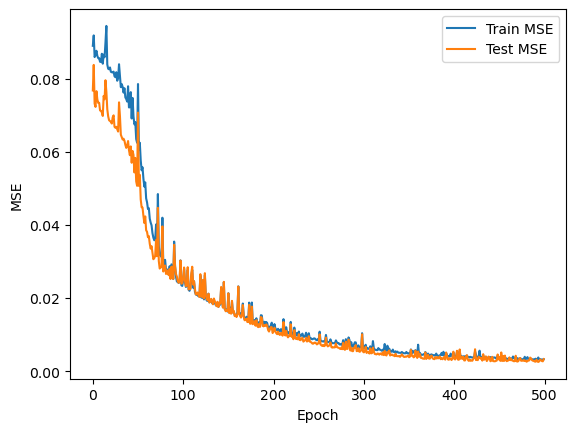

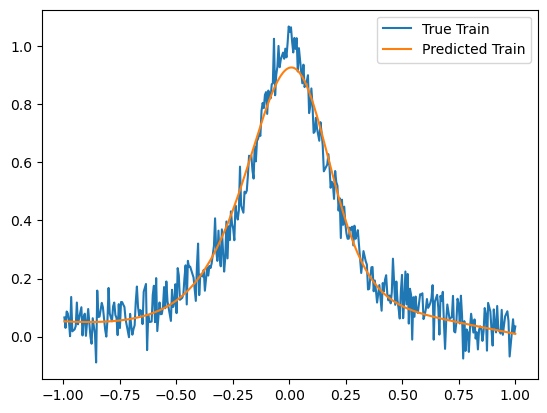

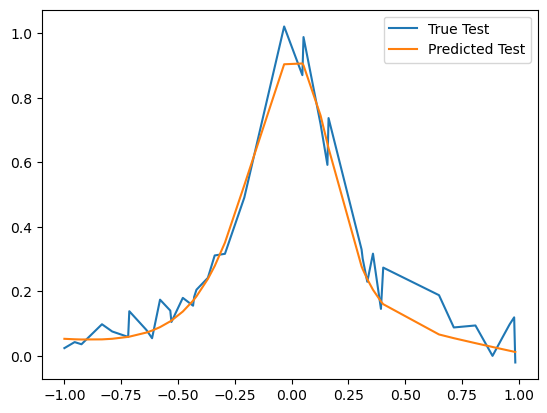

([(array([[-1.2434304 ,  1.31377706, -0.80625285, -0.2959682 ,  1.53837591,
           -1.49336332,  0.00613386, -0.34614776, -0.19801238, -0.17298103,
            2.01811449,  0.70291384, -0.02375718,  0.60959324,  1.69106299,
            1.8235187 , -0.30306355, -0.50661143,  1.04670761, -2.29855026,
           -0.80620949,  0.80809199, -2.63163915, -0.78504906, -0.36989088,
            0.3521503 ,  2.15203688, -2.08780589, -0.0068314 , -3.36286141,
           -1.16932445,  2.22828856, -1.46485072, -2.8141348 , -1.73338824,
           -2.06608489, -0.77185116, -1.3076199 ,  0.31540229, -2.63085576,
           -0.14780716,  0.89775811,  1.54240483,  0.27639741, -0.6976336 ,
           -2.20770141, -1.6018882 ,  1.27778114, -0.25869916,  0.58785426]]),
   array([ 1.10784534e-02, -3.24722056e-03, -1.65117549e-02,  5.70224669e-02,
           1.65628429e-02, -1.69956363e-02,  3.17392623e-03,  3.98799939e-02,
           3.31256122e-02,  2.22604218e-02,  4.09611755e-02,  3.47895149e-02,
   

In [173]:
from sklearn.model_selection import train_test_split
import numpy as np  # Regular np is fine here
import matplotlib.pyplot as plt

def runge(x):
    return 1 / (1 + 25 * x**2)

batch_size = 400
x = np.linspace(-1, 1, batch_size).reshape(-1, 1)
y = runge(x) + 0.05 * np.random.normal(0, 1, batch_size).reshape(-1, 1)

network_input_size = 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
print(x.shape)
print(y.shape)
print(x_train.shape)
print(y_train.shape)


"""
activation_funcs = [ReLU, ReLU, lambda x: x]  # ReLU hidden, linear output
activation_ders = [ReLU_der, ReLU_der, lambda x: np.ones_like(x)]
"""
activation_funcs = [sigmoid, sigmoid, lambda x: x]  # ReLU hidden, linear output
activation_ders = [sigmoid_der, sigmoid_der, lambda x: np.ones_like(x)]

layer_output_sizes = [50, 50, 1]
learning_rate = 0.1
epochs = 500
train_batch_size = 18  # Add mini-batching

layers = create_layers_batch(network_input_size, layer_output_sizes)

def train_network(x_train, x_test, y_train, y_test, layers, activation_funcs, activation_ders, learning_rate, epochs, batch_size=18):
    train_losses = []
    test_losses = []
    for epoch in range(epochs):
        # Shuffle
        perm = np.random.permutation(x_train.shape[0])
        x_shuffled = x_train[perm]
        y_shuffled = y_train[perm]
        
        # Mini-batch loop
        for start in range(0, x_train.shape[0], batch_size):
            end = min(start + batch_size, x_train.shape[0])
            input_batch = x_shuffled[start:end]
            target_batch = y_shuffled[start:end]
            
            layers_grad = backpropagation_batch(input_batch, layers, activation_funcs, target_batch, activation_ders, cost_der=mse_der)
            for (W, b), (W_g, b_g) in zip(layers, layers_grad):
                W -= learning_rate * W_g
                b -= learning_rate * b_g
        
        # Losses
        train_pred = feed_forward(x_train, layers, activation_funcs)
        test_pred = feed_forward(x_test, layers, activation_funcs)
        train_mse = mse(train_pred, y_train)
        test_mse = mse(test_pred, y_test)
        train_losses.append(train_mse)
        test_losses.append(test_mse)
        print(f"Epoch {epoch+1}, Train MSE: {train_mse:.3f}, Test MSE: {test_mse:.3f}")
    
    # Plot losses
    plt.plot(train_losses, label='Train MSE')
    plt.plot(test_losses, label='Test MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()
    
    # Plot predictions (sorted for curve visualization)
    sort_idx_train = np.argsort(x_train[:, 0])
    plt.plot(x_train[sort_idx_train], y_train[sort_idx_train], label='True Train')
    plt.plot(x_train[sort_idx_train], train_pred[sort_idx_train], label='Predicted Train')
    plt.legend()
    plt.show()
    
    sort_idx_test = np.argsort(x_test[:, 0])
    plt.plot(x_test[sort_idx_test], y_test[sort_idx_test], label='True Test')
    plt.plot(x_test[sort_idx_test], test_pred[sort_idx_test], label='Predicted Test')
    plt.legend()
    plt.show()
    
    return layers, train_losses, test_losses

train_network(x_train, x_test, y_train, y_test, layers, activation_funcs, activation_ders, learning_rate, epochs, train_batch_size)

In [174]:
"""
#Gradient verification with autograd

verify_grad = backpropagation_batch(x_train, layers, activation_funcs, y_train, activation_ders)
print("Backprop =",verify_grad[-1][0])


#Verify gradients
def cost(x_train, layers, activation_funcs, y_train):
    predict = feed_forward_saver_batch(x_train, layers, activation_funcs)[2]
    return mse(predict, y_train)

"""
def feed_forward_specific(x, layers):
    W1, b1 = layers[0]
    W2, b2 = layers[1]
    W3, b3 = layers[2]
    a = x
    z = a @ W1 + b1
    a = sigmoid(z)
    z = a @ W2 + b2
    a = sigmoid(z)
    z = a @ W3 + b3
    a = z  # linear
    return a

def cost(x_train, layers, y_train):  # Keep signature, but ignore activation_funcs
    predict = feed_forward_specific(x_train, layers)
    return mse(predict, y_train)
"""

cost_grad = grad(cost, 1)
autoG = cost_grad(x_train, layers, activation_funcs, y_train)

print("Autograd =",autoG)
print("Backprop =",verify_grad)

"""
diff = 0
for i in range(len(computed)):
    diff += abs(computed[-1][0][0][i])-abs(autoG[-1][0][0][i])
if diff <= 10**-6:
    print("Same gradients")
"""
"""


IndexError: invalid index to scalar variable.